In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import spacy
import seaborn as sns
nlp = spacy.load('en')

In [2]:
pet = pd.read_json('/Users/harishprabhala/Downloads/Pet_Supplies_5.json', lines=True)

In [3]:
pet.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1223000893,"[0, 0]",3,I purchased the Trilogy with hoping my two cat...,"01 12, 2011",A14CK12J7C7JRK,Consumer in NorCal,Nice Distraction for my cats for about 15 minutes,1294790400
1,1223000893,"[0, 0]",5,There are usually one or more of my cats watch...,"09 14, 2013",A39QHP5WLON5HV,Melodee Placial,Entertaining for my cats,1379116800
2,1223000893,"[0, 0]",4,I bought the triliogy and have tested out all ...,"12 19, 2012",A2CR37UY3VR7BN,Michelle Ashbery,Entertaining,1355875200
3,1223000893,"[2, 2]",4,My female kitty could care less about these vi...,"05 12, 2011",A2A4COGL9VW2HY,Michelle P,Happy to have them,1305158400
4,1223000893,"[6, 7]",3,"If I had gotten just volume two, I would have ...","03 5, 2012",A2UBQA85NIGLHA,"Tim Isenhour ""Timbo""",You really only need vol 2,1330905600


In [4]:
pet = pet[['overall','reviewText']]

In [5]:
pet.isnull().sum()

overall       0
reviewText    0
dtype: int64

In [6]:
pet.head()

,overall,reviewText
0,3,I purchased the Trilogy with hoping my two cat...
1,5,There are usually one or more of my cats watch...
2,4,I bought the triliogy and have tested out all ...
3,4,My female kitty could care less about these vi...
4,3,"If I had gotten just volume two, I would have ..."


In [7]:
pet['overall'].mean()

4.229744798398338

In [8]:
pet.groupby('overall')['reviewText'].count()

overall
1     8748
2     8907
3    15933
4    27995
5    96253
Name: reviewText, dtype: int64

In [9]:
pet["overall"] = pet["overall"].apply(lambda x: '1' if x > 3 else '0') 

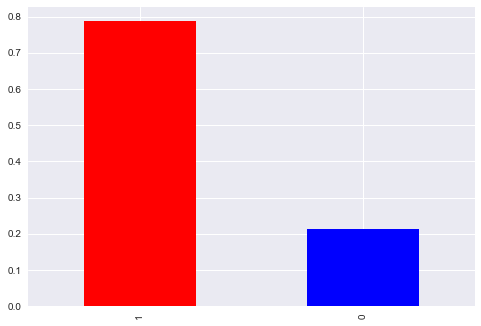

In [10]:
pet['overall'].value_counts('1').plot(kind='Bar', color=['r','b'])

In [11]:
pet['overall'].value_counts('1')*100

1    78.719684
0    21.280316
Name: overall, dtype: float64

In [12]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist

nlp = spacy.load('en')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harishprabhala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [14]:
tokens = pet["reviewText"].apply(nltk.word_tokenize)

In [15]:
tokens.count()

157836

In [16]:
tokens.head()

0    [I, purchased, the, Trilogy, with, hoping, my,...
1    [There, are, usually, one, or, more, of, my, c...
2    [I, bought, the, triliogy, and, have, tested, ...
3    [My, female, kitty, could, care, less, about, ...
4    [If, I, had, gotten, just, volume, two, ,, I, ...
Name: reviewText, dtype: object

In [17]:
allwords = []
for words in tokens:
    allwords += words

In [18]:
lower_words = (x.lower() for x in allwords)

In [19]:
stop_sentence = [w for w in lower_words if not w in stop]

In [65]:
punc = [w for w in stop_sentence if not w in string.punctuation]

In [67]:
punc

['purchased',
 'trilogy',
 'hoping',
 'two',
 'cats',
 'age',
 '3',
 '5',
 'would',
 'interested',
 '3',
 'yr',
 'old',
 'cat',
 'fascinated',
 '15',
 'minutes',
 'pictures',
 'came',
 'got',
 'bored',
 '5',
 'year',
 'old',
 'watched',
 'minutes',
 'walked',
 'away',
 'possible',
 'wonderful',
 'courtyard',
 'full',
 'greenery',
 'trees',
 'one',
 'neighbors',
 'bird',
 'feeder',
 'enough',
 'going',
 'outside',
 'prefer',
 'real',
 'life',
 'versus',
 'taped',
 'version',
 'likely',
 'pass',
 'friend',
 'cats',
 "n't",
 'much',
 'wildlife',
 'watch',
 'mine',
 'usually',
 'one',
 'cats',
 'watching',
 'tv',
 'staying',
 'trouble',
 'dvd',
 'playing',
 'seem',
 'like',
 'mice',
 'birds',
 'maybe',
 'go',
 'little',
 'less',
 'stir',
 'crazy',
 'inside',
 'time',
 'bought',
 'triliogy',
 'tested',
 'dvds',
 'appears',
 'volume',
 '2',
 'well',
 'received',
 'three',
 'one',
 'would',
 'recommend',
 "'s",
 'funny',
 'watch',
 'cat',
 'watch',
 'bc',
 'looks',
 'behind',
 'tv',
 'trying'

In [21]:
clean_words = [w for w in punc if not w.isnumeric()]

In [22]:
no_integers = [x for x in clean_words if not isinstance(x, int)]

In [23]:
final_words = []
for w in no_integers:
        stemmed = lemmatizer.lemmatize(w)
        final_words.append(stemmed)

In [24]:
fdist = FreqDist(final_words)
fdist.most_common(20)

[('dog', 133962),
 ("n't", 103693),
 ('cat', 93180),
 ("'s", 88017),
 ('one', 74765),
 ('like', 64404),
 ('love', 55304),
 ('get', 52009),
 ('would', 50840),
 ('food', 49562),
 ('toy', 41499),
 ('product', 41427),
 ('great', 37345),
 ('time', 36319),
 ('use', 36039),
 ('good', 34269),
 ('well', 33359),
 ('work', 31811),
 ('treat', 30172),
 ('really', 29520)]

In [25]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [26]:
delete = ("n't", "'s", "'m", "ca", "-----", "---", "...", "“", "”", "'ve","''","'99.5","'99.7")

In [27]:
final_words = [w for w in final_words if not w in delete]

In [28]:
fdist = FreqDist(final_words)
fdist.most_common(10)

[('dog', 133962),
 ('cat', 93180),
 ('one', 74765),
 ('like', 64404),
 ('love', 55304),
 ('get', 52009),
 ('would', 50840),
 ('food', 49562),
 ('toy', 41499),
 ('product', 41427)]

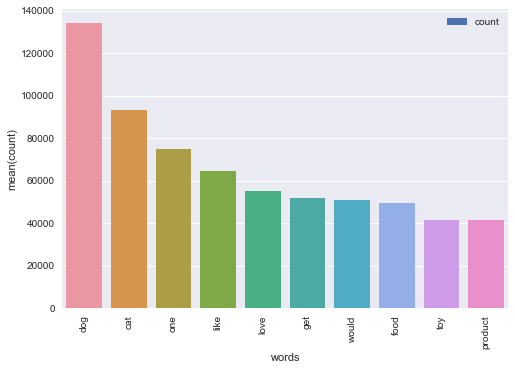

In [29]:
word_hist = pd.DataFrame(fdist.most_common(10),columns=['words','count'])
word_hist.plot(kind='Bar', x='words')
sns.barplot(x="words", y="count", data=word_hist)

In [30]:
fdist = FreqDist(final_words)
fdist.most_common()[-20:]

[('dogs-no', 1),
 ("'me", 1),
 ('zd', 1),
 ('wonderfuly', 1),
 ('non-irritable', 1),
 ('brush.any', 1),
 ('hercoat', 1),
 ('norotic', 1),
 ('construction.2', 1),
 ('nicer.in', 1),
 ('dangerous.however', 1),
 ('tangles.the', 1),
 ("reign'.the", 1),
 ('kine', 1),
 ('//www.amazon.com/gp/product/b008em5jjs/ref=wms_ohs_product', 1),
 ('=1that', 1),
 ('nicely.overall', 1),
 ('flexi.highly', 1),
 ('tree.one', 1),
 ('retract.overall', 1)]

In [31]:
print(len(fdist))

147198


In [32]:
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models

import pyLDAvis
import pyLDAvis.gensim

In [33]:
bigram = Phrases(final_words, min_count=1, threshold=2)

In [34]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [35]:
finder = BigramCollocationFinder.from_words(final_words)
finder.nbest(bigram_measures.chi_sq, 30)

[("''hob", 'filter.5'),
 ("'abandonment", "issues'.i"),
 ("'bad'.the", "'negative"),
 ("'boost", 'intensity.-the'),
 ("'buuut", 'heyyyy'),
 ("'comfort", "food'.dogs"),
 ("'de-squeaking", 'cuz.if'),
 ("'deep", "cleaning'/large"),
 ("'delicate", 'wainscoting'),
 ("'drawer'.we", 'hoodwinked'),
 ("'entirely", "pets'.i"),
 ("'found", 'photosand'),
 ("'houses'-easy", 'assemble-reasonably'),
 ("'ilk", 'afsdl'),
 ("'imperfect", "'rejected"),
 ("'inventions", 'ms.grandin.her'),
 ("'jungle", 'juice/mixed'),
 ("'kung", 'pao'),
 ("'m'adaptaplug", '273-344on'),
 ("'master", "'friend"),
 ("'mature", "'aged"),
 ("'meditating", 'daydreaming'),
 ("'nick", "'continuous"),
 ("'oohhhhhhh", 'noooooooos'),
 ("'prize", 'collected.the'),
 ("'problem", 'clients..'),
 ("'pull-up", "'push-off"),
 ("'rabbit", "'field"),
 ("'reaction", "time'.test"),
 ("'reluctant", 'enthusiastic.they')]

In [62]:
final_words_unic = []
for i in final_words:
    final_words_unic.append(bytes(str(i).encode('utf-8')))    

In [68]:
#dictionary = corpora.Dictionary(final_words_unic)
#doc_term_matrix = [dictionary.doc2bow(doc) for doc in final_words_unicode]

In [38]:
pet.head(10)

,overall,reviewText
0,0,I purchased the Trilogy with hoping my two cat...
1,1,There are usually one or more of my cats watch...
2,1,I bought the triliogy and have tested out all ...
3,1,My female kitty could care less about these vi...
4,0,"If I had gotten just volume two, I would have ..."
5,1,"My Rottie has food allergies to poultry, beef ..."
6,1,My puppy loves this stuff! His tail starts wag...
7,1,My toy poodle loves this stuff and will let me...
8,1,Works great and dog doesn't hate the taste. G...
9,1,"Yes , my Princess is enjoying the taste showin..."


In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

/Users/harishprabhala/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
vec= CountVectorizer()
X = vec.fit_transform(pet.reviewText)
X = X.tocsc()
y = (pet.overall)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [42]:
X.shape, y.shape

((157836, 70861), (157836,))

In [43]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((118377, 70861), (118377,), (39459, 70861), (39459,))

In [69]:
clf=MultinomialNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print ('Accuracy of test data: ',(accuracy_score(clf.predict(X_test), y_test)))
print ('Accuracy of training data: ',(accuracy_score(clf.predict(X_train), y_train)))
print("\n")
print ('Classification report summary of MultinomialDB:')
print (classification_report(y_test, y_pred))

Accuracy of test data:  0.844826275374
Accuracy of training data:  0.871850106017


Classification report summary of MultinomialDB:
             precision    recall  f1-score   support

          0       0.66      0.55      0.60      8304
          1       0.88      0.92      0.90     31155

avg / total       0.84      0.84      0.84     39459



In [45]:
kf = KFold(n_splits=5, shuffle=True)
for train, test in kf.split(X):
    X1_train, X1_test = X[train], X[test]
    y1_train, y1_test = y[train], y[test]

In [46]:
clf=MultinomialNB(alpha=4)
clf.fit(X1_train,y1_train)
print ('Accuracy of test data: ',(accuracy_score(clf.predict(X1_test), y1_test)))
print ('Accuracy of training data: ',(accuracy_score(clf.predict(X1_train), y1_train)))

Accuracy of test data:  0.827731491748
Accuracy of training data:  0.841798066034


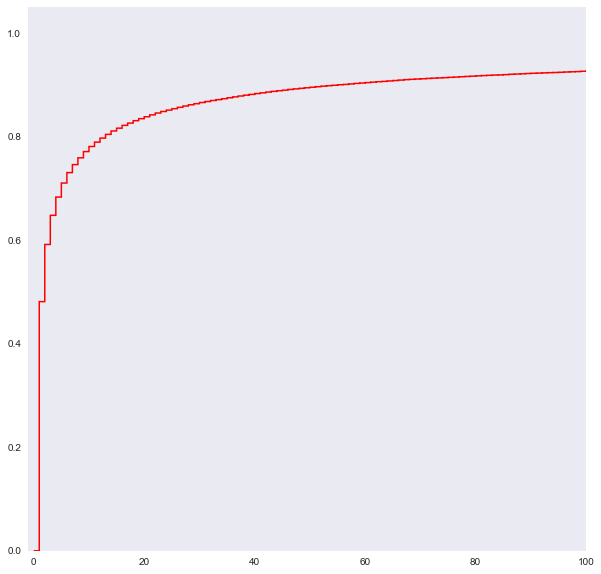

In [47]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
df = list((X > 0).sum(0).tolist()[0])
c = pd.Series(df)
y = np.arange(c.sum())
plt.hist(c,y,normed=1, histtype='step', color='r', cumulative=True, linewidth=1.5, )
plt.xlim(-1,100)
plt.grid()

In [48]:
vec1= CountVectorizer(min_df=12, max_df=60)
X1 = vec1.fit_transform(pet.reviewText)
X1 = X.tocsc()
y1 = (pet.overall)

In [49]:
kf = KFold(n_splits=5, shuffle=True)
for train, test in kf.split(X):
    X2_train, X2_test = X1[train], X1[test]
    y2_train, y2_test = y1[train], y1[test]

In [70]:
clf1=MultinomialNB(alpha=1)
clf1.fit(X2_train,y2_train)
print ('Accuracy of test data: ',(accuracy_score(clf.predict(X2_test), y2_test)))
print ('Accuracy of training data: ',(accuracy_score(clf.predict(X2_train), y2_train)))
print("\n")
print ('Classification report summary of MultinomialDB with new hyperparameters:')
print(classification_report(clf.predict(X2_test), y2_test))


Accuracy of test data:  0.864890550258
Accuracy of training data:  0.865145047478


Classification report summary of MultinomialDB with new hyperparameters:
             precision    recall  f1-score   support

          0       0.60      0.72      0.65      5627
          1       0.94      0.90      0.92     25940

avg / total       0.88      0.86      0.87     31567



In [51]:
#rev = vectorizer.transform(['This movie is not remarkable, touching, or superb in any way'])
#clf1.predict(rev)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import grid_search

/Users/harishprabhala/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [53]:
#Cs = [0.001, 0.1, 1, 10, 100]
#parameters = {'C':Cs}
#log = LogisticRegression()
#clf2 = grid_search.GridSearchCV(log, parameters)
#clf2.fit(X_train,y_train)
#clf2.best_params

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(min_df=1)
Xtfidf=tfidfvectorizer.fit_transform(pet.reviewText)
Xtfidf1 = Xtfidf.tocsc()
ytfidf1 = (pet.overall)

In [55]:
kf = KFold(n_splits=10, shuffle=True)
for train, test in kf.split(Xtfidf1):
    Xtf_train, Xtf_test = Xtfidf1[train], Xtfidf1[test]
    ytfidf1_train, ytfidf1_test = ytfidf1[train], ytfidf1[test]

In [71]:
clf3=MultinomialNB(alpha=1).fit(Xtf_train,ytfidf1_train)
print ('Accuracy of test data: ',(accuracy_score(clf3.predict(Xtf_test), ytfidf1_test)))
print ('Accuracy of training data: ',(accuracy_score(clf3.predict(Xtf_train), ytfidf1_train)))
print("\n")
print ('Classification report summary of MultinomialDB with TF-IDF:')
print(classification_report(clf3.predict(Xtf_test), ytfidf1_test))

Accuracy of test data:  0.7935753659
Accuracy of training data:  0.791303245972


Classification report summary of MultinomialDB with TF-IDF:
             precision    recall  f1-score   support

          0       0.01      0.80      0.03        55
          1       1.00      0.79      0.88     15728

avg / total       1.00      0.79      0.88     15783



### Feature extraction and dimensionality reduction

In [57]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [58]:
#pca.fit(Xtfidf)
#PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [59]:
#svd=TruncatedSVD(n_components=300)

In [60]:
#svd.fit_transform(Xtf_train)